<a href="https://colab.research.google.com/github/Swarakaranjawane/Excel-HR-Attrition-Analysis/blob/main/Code_B_integrated_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 1**

**Business Problem**
* Phishing websites are designed to deceive users into believing they are legitimate sites, often to steal credentials or personal information.
* The goal of this analysis is to identify characteristics of phishing websites and potentially build a model to detect them.


**Scope:**
- Identify key characteristics that differentiate phishing websites from legitimate ones
- Develop a machine learning model that can classify websites as phishing or legitimate with high accuracy
- Create an interpretable solution that can explain why a particular website was flagged as phishing
- Focus on URL-based and content-based features that can be extracted and analyzed in real-time


**Importance of Phishing Detection:**
- Financial Impact: The Anti-Phishing Working Group reported that the average direct cost of a phishing attack for a mid-sized company exceeds $1.6 million
- Scale of Threat: According to the FBI's Internet Crime Report, phishing was the most common type of cybercrime in 2022, with over 300,000 reported incidents
- Data Security: Verizon's Data Breach Investigations Report found that phishing was involved in 36% of data breaches
- Evolving Tactics: Phishers continually refine their techniques, making detection an ongoing challenge requiring sophisticated approaches
- User Protection: Effective phishing detection serves as a critical safety net for users with varying levels of security awareness


**Exploring the dataset features**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv(r'/content/sample_data/dataset_phishing.csv')

In [16]:
df.shape

(11430, 89)

In [17]:
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [18]:
df.tail()

url  length_url  \
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
11425               17   0        2           0      0      0       0      0   
11426               18   0        5           0      1      1       0      0   
11427               16   1        2           6      0      1       0      0   
11428               30   0        2           0      0      0       0      0   
11429               14   1       24           0      1      1       9      0   

       ...  domain_in_title  domain_with_copyright  whois_registered_domain  \
11425  ...                0                      0                        0   
11426  ...                1                      0                        0   
11427  ...                0                      0                        0   
11428  ...                1                      0                        0   
11429  ...                1                      1                        1   

       domain_registration_length  domain_age  web_traffic  dns_record  \
11425                         448        5396         3980           0   
11426                         211        6728            0           0   
11427                        2809        8515            8           0   
11428                          85        2836      2455493           0   
11429                           0          -1            0           1   

       google_index  page_rank      status  
11425             0          6  legitimate  
11426             1          0    phishing  
11427             1         10  legitimate  
11428             0          4  legitimate  
11429             1          0    phishing  

[5 rows x 89 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [20]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

**Target Variable Distribution**

In [21]:
# Check target variable distribution
df["status"].value_counts(normalize=True) * 100

status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64

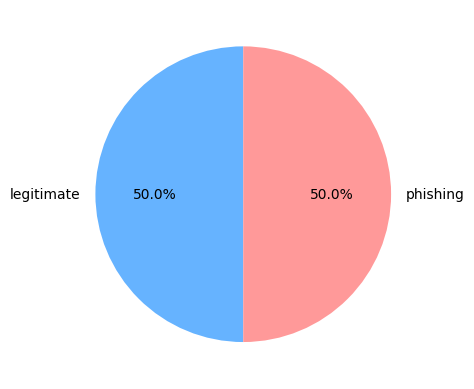

In [22]:
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff', '#ff9999'])
plt.show()

**Univariate Analysis**

In [23]:
df.describe().T

count           mean           std   min     25%     50%  \
length_url       11430.0      61.126684  5.529732e+01  12.0   33.00    47.0   
length_hostname  11430.0      21.090289  1.077717e+01   4.0   15.00    19.0   
ip               11430.0       0.150569  3.576436e-01   0.0    0.00     0.0   
nb_dots          11430.0       2.480752  1.369686e+00   1.0    2.00     2.0   
nb_hyphens       11430.0       0.997550  2.087087e+00   0.0    0.00     0.0   
...                  ...            ...           ...   ...     ...     ...   
domain_age       11430.0    4062.543745  3.107785e+03 -12.0  972.25  3993.0   
web_traffic      11430.0  856756.643307  1.995606e+06   0.0    0.00  1651.0   
dns_record       11430.0       0.020122  1.404254e-01   0.0    0.00     0.0   
google_index     11430.0       0.533946  4.988682e-01   0.0    0.00     1.0   
page_rank        11430.0       3.185739  2.536955e+00   0.0    1.00     3.0   

                       75%         max  
length_url           71.00      1641.0  
length_hostname      24.00       214.0  
ip                    0.00         1.0  
nb_dots               3.00        24.0  
nb_hyphens            1.00        43.0  
...                    ...         ...  
domain_age         7026.75     12874.0  
web_traffic      373845.50  10767986.0  
dns_record            0.00         1.0  
google_index          1.00         1.0  
page_rank             5.00        10.0  

[87 rows x 8 columns]

**Histogram and KDE(Feature Distribution)**

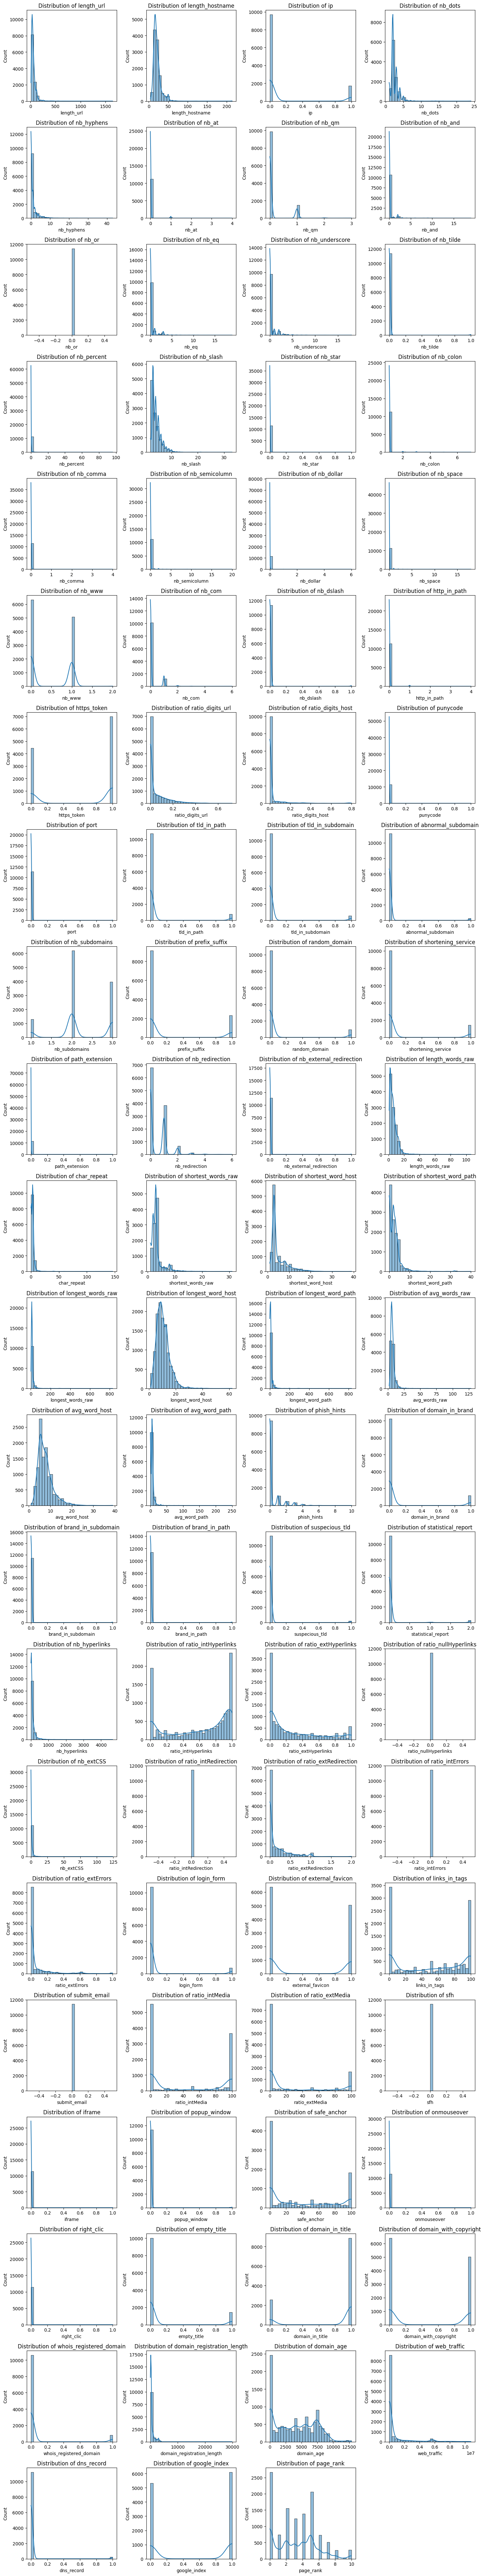

In [24]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 80))

# Plot histograms and KDE for all numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//4 + 1, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

**Boxplot (Outlier Detection)**

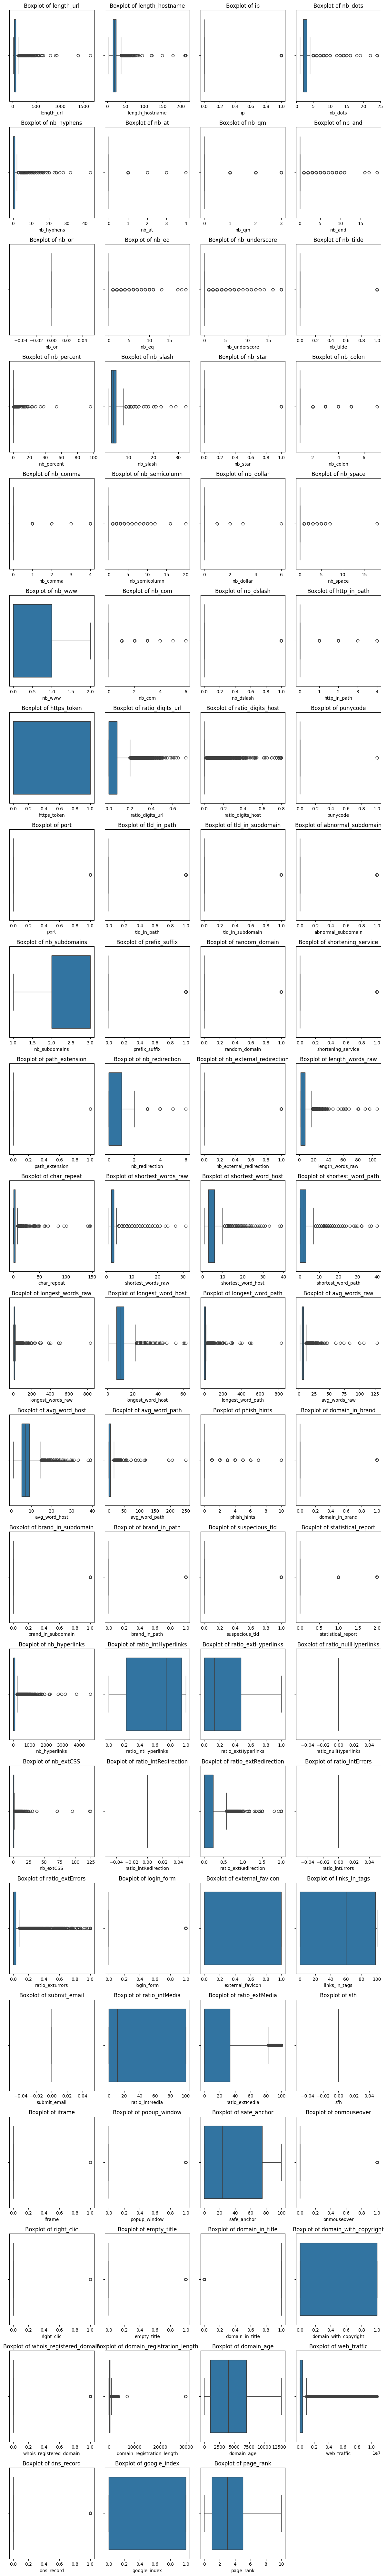

In [25]:
plt.figure(figsize=(12, 80))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//4 + 1, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

In [26]:
df.select_dtypes(['object'])

url      status
0                  http://www.crestonwood.com/router.php  legitimate
1      http://shadetreetechnology.com/V4/validation/a...    phishing
2      https://support-appleld.com.secureupdate.duila...    phishing
3                                     http://rgipt.ac.in  legitimate
4      http://www.iracing.com/tracks/gateway-motorspo...  legitimate
...                                                  ...         ...
11425      http://www.fontspace.com/category/blackletter  legitimate
11426  http://www.budgetbots.com/server.php/Server%20...    phishing
11427  https://www.facebook.com/Interactive-Televisio...  legitimate
11428             http://www.mypublicdomainpictures.com/  legitimate
11429  http://174.139.46.123/ap/signin?openid.pape.ma...    phishing

[11430 rows x 2 columns]

**Bivariate Analysis**

**Feature Distributions for Phishing vs. Legitimate**

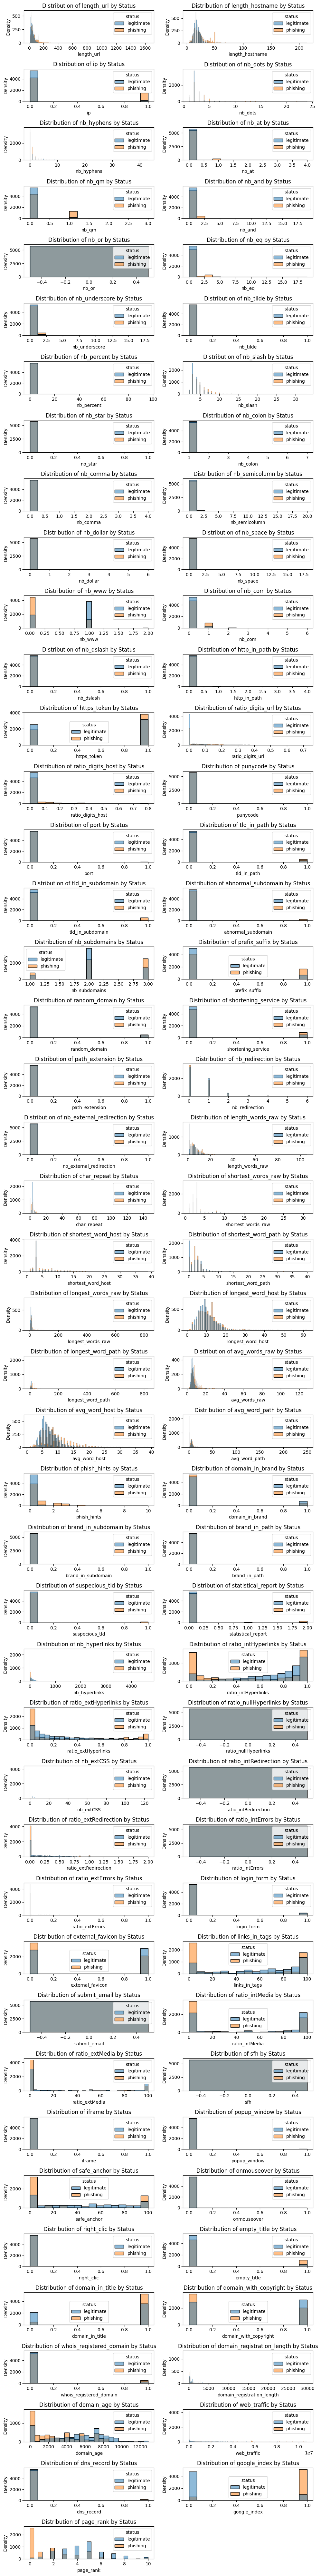

In [27]:
# Set up the figure for histograms
plt.figure(figsize=(10, 80))

# Create histograms for each feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//2 + 1, 2, i)
    sns.histplot(df, x=feature, hue="status")
    plt.title(f"Distribution of {feature} by Status")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

**Boxplot (Numerical Feature vs Categorical Feature)**

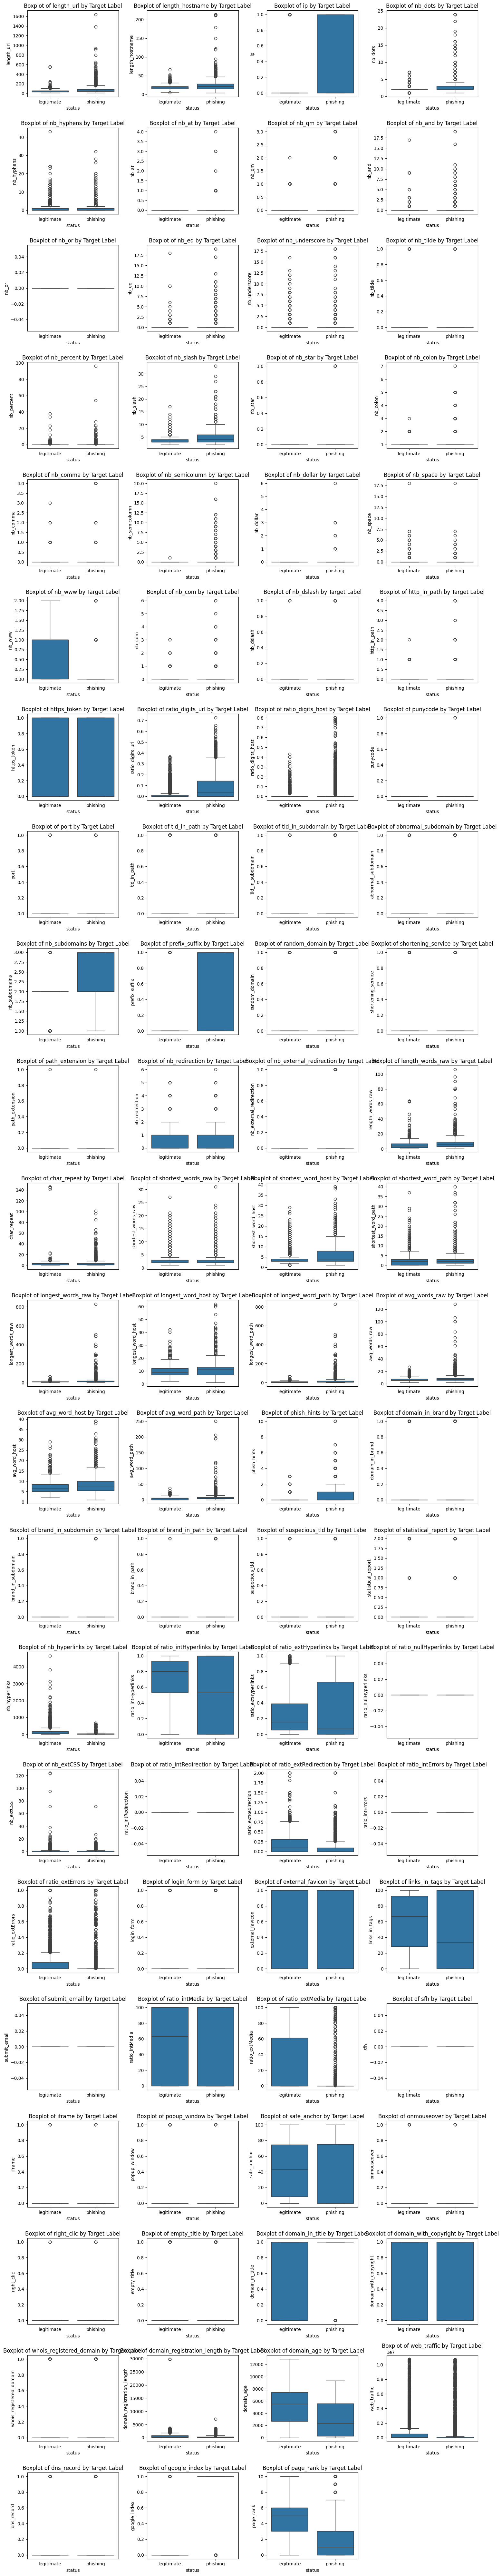

In [28]:
# Comparing numerical feature with a categorical feature
plt.figure(figsize=(15, 80))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//4 + 1, 4, i)
    sns.boxplot(x=df['status'], y=df[feature])
    plt.title(f"Boxplot of {feature} by Target Label")

plt.tight_layout()
plt.show()

**Multivariate Analysis (Relationships Between Multiple Features)**

**Correlation Heatmap**

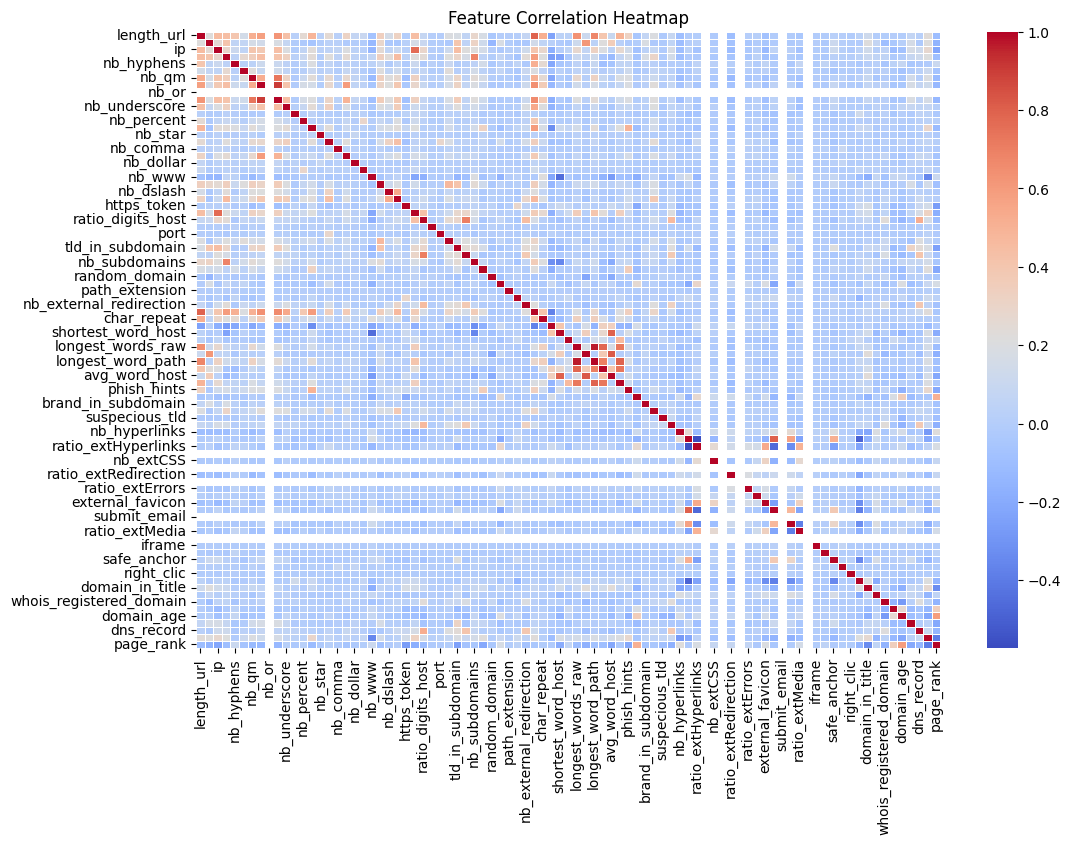

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [45]:
# Convert "status" to numeric (phishing = 1, legitimate = 0)
df_numeric = df.select_dtypes(['int64','float64'])
df_numeric["status_numeric"] = df["status"].map({"legitimate": 0, "phishing": 1})

# Compute correlation with "status_numeric"
correlations= df_numeric.corr()
correlations.iloc[:,-1]

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status_numeric     1.000000
Name: status_numeric, Length: 88, dtype: float64

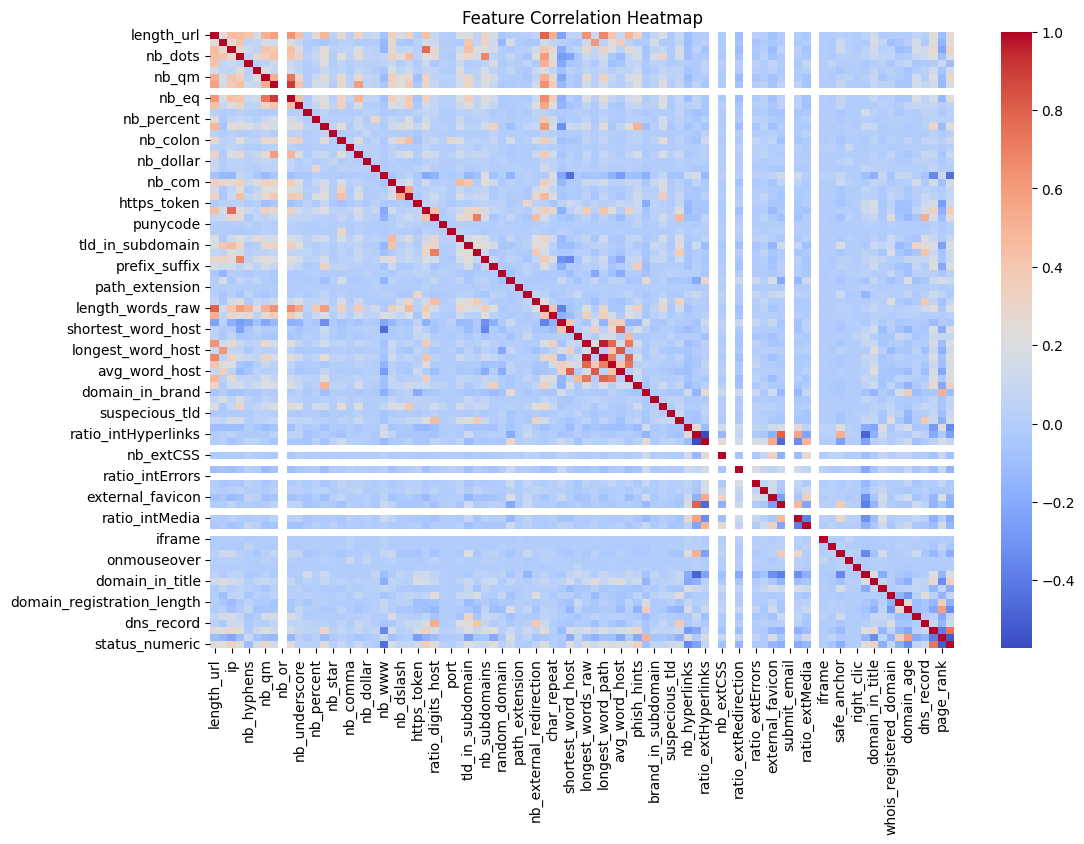

In [46]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Identifying Outliers**

In [37]:
# Identify potential outliers using IQR (Interquartile Range)
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()
outliers

length_url          620
length_hostname     775
ip                 1721
nb_dots             567
nb_hyphens         1371
                   ... 
domain_age            0
web_traffic        2138
dns_record          230
google_index          0
page_rank             0
Length: 87, dtype: int64

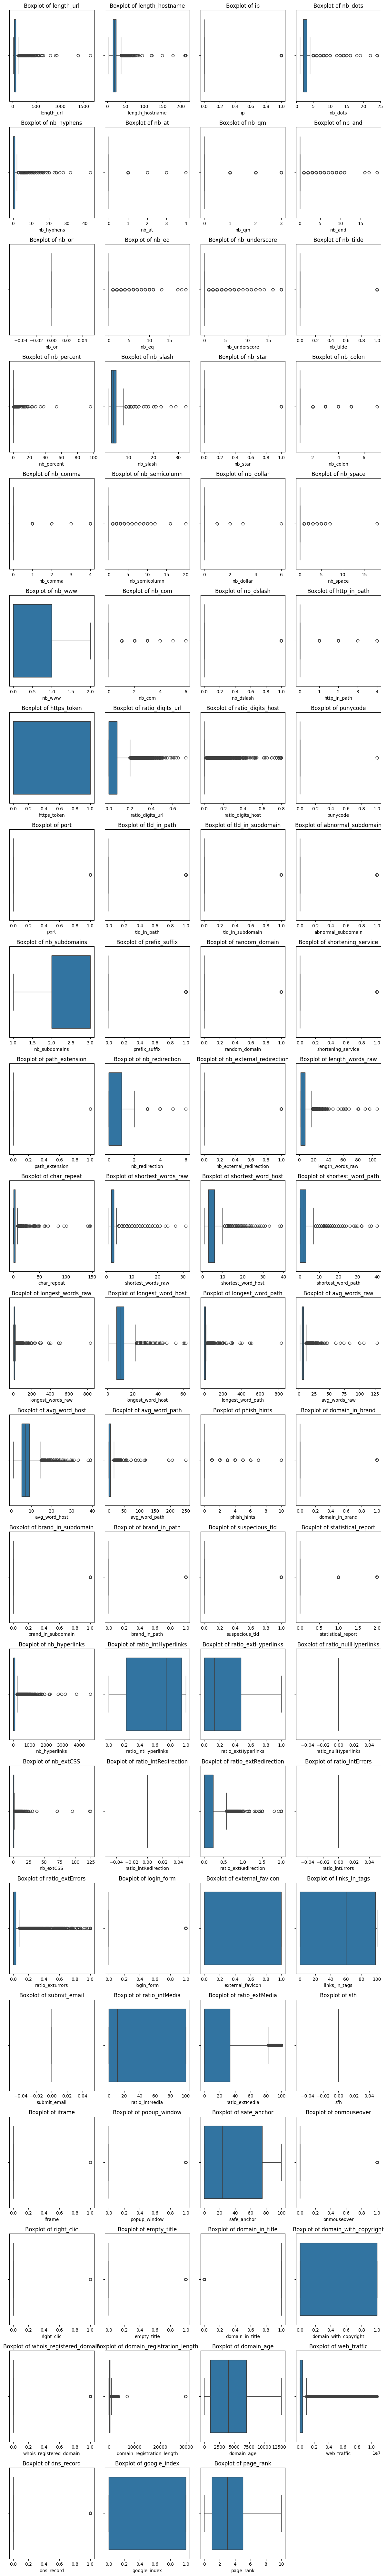

In [42]:
# Create boxplots to detect extreme values
plt.figure(figsize=(12, 80))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//4 + 1, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


**A box plot analysis revealed significant outliers in multiple numerical features, including:**

- Features with high variance and extreme values: length_url, nb_slash, ratio_digits_url, phish_hints, etc.
- Features where outliers could indicate phishing behavior and should be retained: phish_hints, nb_subdomains, nb_qm, etc.
- Features with potential data errors (e.g., negative or unrealistic values).

**Strategies for Handling Outliers:**
- Keep meaningful outliers if they contribute to phishing detection.
- Apply Robust Scaling for features where outliers are common but important.
- Winsorization (Capping) to limit extreme values beyond a defined threshold.
- Log transformation to normalize skewed distributions.
- Clipping to remove impossible values (e.g., negative numbers where not applicable).

**Check For Duplicate**

In [44]:
print(f"Total duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 0


In [47]:
from google.colab import auth
auth.authenticate_user()

!git config --global user.email "swarakaranjawane@gmail.com"
!git config --global user.name "Swarakaranjawane"

In [48]:
!git clone https://github.com/Swarakaranjawane/Phishing-Website-Detection.git

Cloning into 'Phishing-Website-Detection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [50]:
!mv Code_B_integrated_Internship.ipynb /Phishing-Website-Detection/

mv: cannot stat 'Code_B_integrated_Internship.ipynb': No such file or directory


**Week 2**

**Week 3**

**Week 4**

**Week 5**

**Week 6**

**Week 7**

**Week 8**